Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [80]:
from google.colab import files
uploaded = files.upload()

Saving Domestic violence.csv to Domestic violence (1).csv


In [81]:
dom_violence = pd.read_csv("Domestic violence.csv")

Understand the Data

In [82]:
dom_violence

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000,unmarred,no
343,344,26,tertiary,employed,35000,married,no
344,345,27,primary,unemployed,0,married,yes
345,346,29,primary,unemployed,0,married,no


In [103]:
# Replace correct spelling of 'unmarred' to 'unmarried'
dom_violence['Marital status'] = dom_violence['Marital status'].replace('unmarred','unmarried')

In [83]:
dom_violence.columns

Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')

In [84]:
dom_violence.columns = dom_violence.columns.str.strip()

In [85]:
dom_violence.shape

(347, 7)

Check for Null values

In [86]:
dom_violence.isnull().sum()

SL. No            0
Age               0
Education         0
Employment        0
Income            0
Marital status    0
Violence          0
dtype: int64

In [87]:
dom_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SL. No          347 non-null    int64 
 1   Age             347 non-null    int64 
 2   Education       347 non-null    object
 3   Employment      347 non-null    object
 4   Income          347 non-null    int64 
 5   Marital status  347 non-null    object
 6   Violence        347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB


In [88]:
dom_violence['Employment'] = dom_violence['Employment'].str.strip()

**Analysis**

Distribution of age among respondents

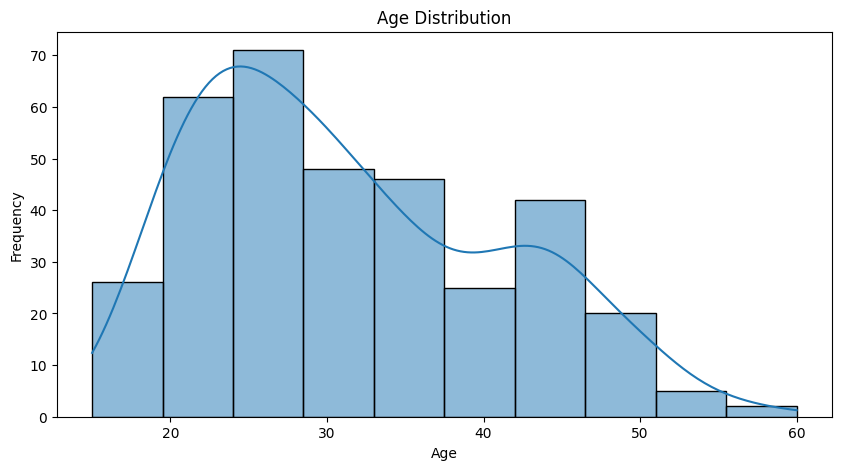

In [89]:
plt.figure(figsize=(10,5))
sns.histplot(dom_violence['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Distibution of respondents who have experienced domestic violence

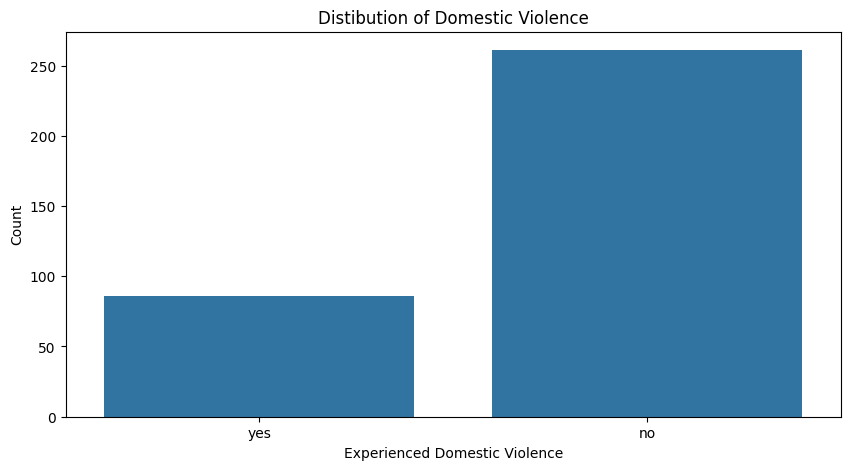

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(x='Violence', data=dom_violence)
plt.title("Distibution of Domestic Violence")
plt.xlabel("Experienced Domestic Violence")
plt.ylabel("Count")
plt.show()

Incidence of Domestic Violence by Age

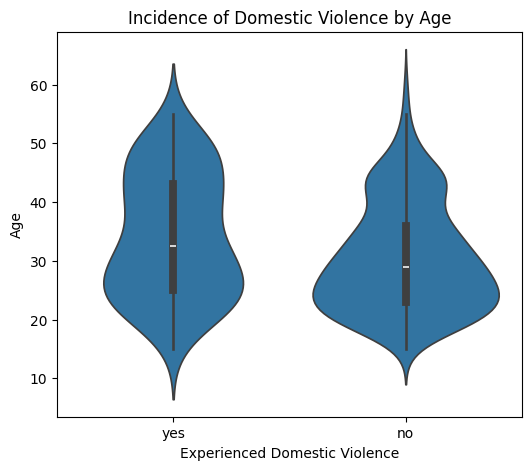

In [114]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Violence', y='Age', data=dom_violence)
plt.title( "Incidence of Domestic Violence by Age")
plt.xlabel("Experienced Domestic Violence")
plt.ylabel("Age")
plt.show()

<ipython-input-92-bf14b78526d1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Violence', y='Age', data=dom_violence, palette='Set2')


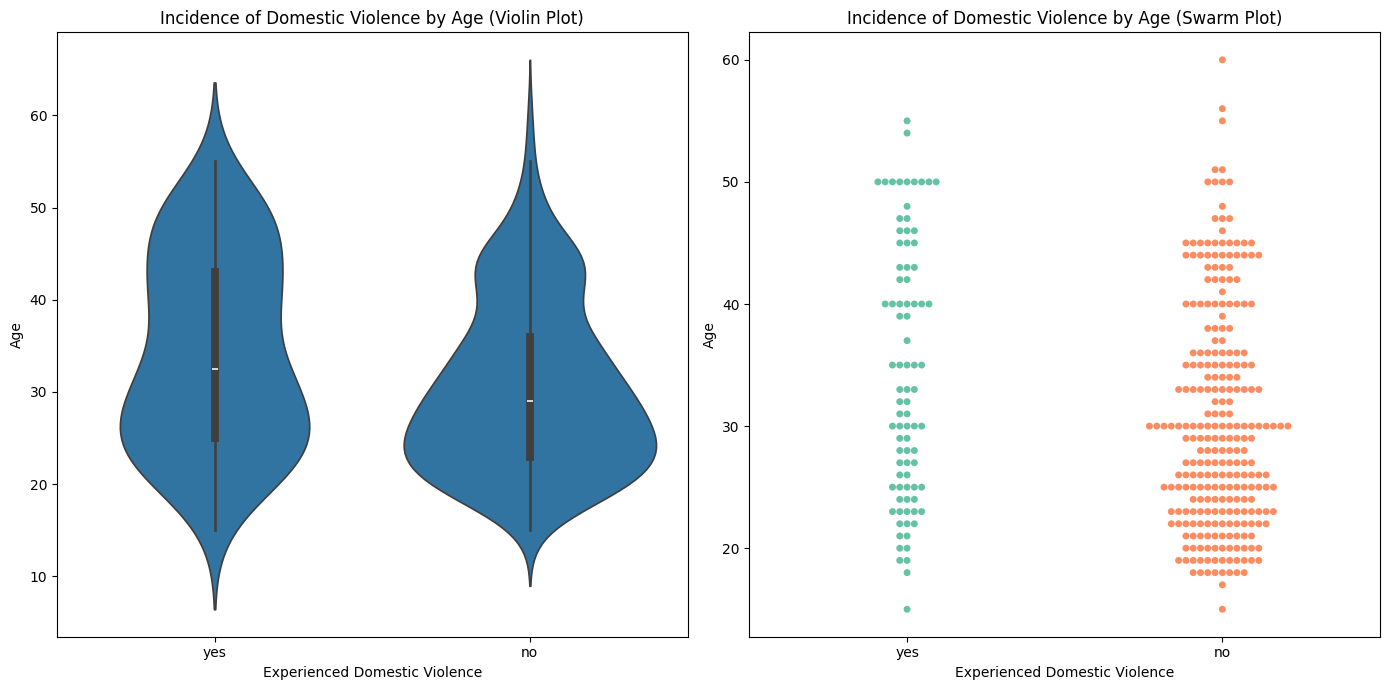

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Violin plot for incidence of domestic violence by age
plt.subplot(1, 2, 1)
sns.violinplot(x='Violence', y='Age', data=dom_violence)
plt.title("Incidence of Domestic Violence by Age (Violin Plot)")
plt.xlabel("Experienced Domestic Violence")
plt.ylabel("Age")

# Swarm plot for detailed distribution
plt.subplot(1, 2, 2)
sns.swarmplot(x='Violence ', y='Age', data=dom_violence, palette='Set2')
plt.title("Incidence of Domestic Violence by Age (Swarm Plot)")
plt.xlabel("Experienced Domestic Violence")
plt.ylabel("Age")

plt.tight_layout()
plt.show()


In [110]:
# Sort the DataFrame by 'Age'
sorted_dom_violence = dom_violence.sort_values(by='Age')

# Count the occurrences of each age and 'Violence ' status
age_counts = sorted_dom_violence['Age'].value_counts().sort_index()
violence_counts = sorted_dom_violence.groupby('Age')['Violence'].value_counts().unstack(fill_value=0)

# Display the sorted age counts and corresponding violence counts
age_violence_counts = pd.concat([age_counts, violence_counts], axis=1)
age_violence_counts.columns = ['Total', 'No Violence', 'Violence']
age_violence_counts = age_violence_counts[['Total', 'Violence', 'No Violence']]  # Reorder columns for clarity
print(age_violence_counts)


     Total  Violence  No Violence
Age                              
15       2         1            1
17       1         0            1
18       9         1            8
19      14         2           12
20      13         2           11
21      12         2           10
22      17         3           14
23      20         5           15
24      12         3            9
25      21         5           16
26      15         2           13
27      13         3           10
28      10         3            7
29      12         2           10
30      25         5           20
31       6         2            4
32       5         2            3
33      15         3           12
34       5         0            5
35      15         5           10
36       8         0            8
37       3         1            2
38       4         0            4
39       3         2            1
40      17         7           10
41       1         0            1
42       7         2            5
43       7    

Relationship between Education Attainment and Domestic Violence

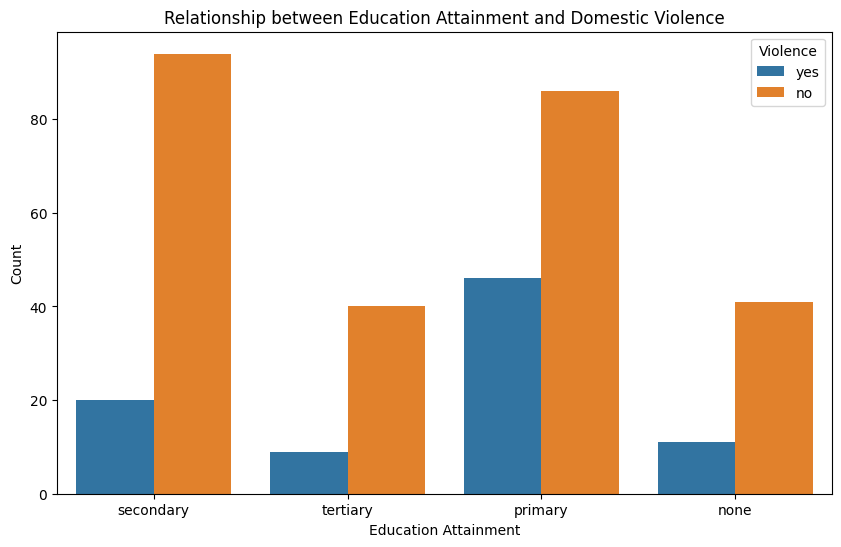

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Violence', data=dom_violence)
plt.title("Relationship between Education Attainment and Domestic Violence")
plt.xlabel("Education Attainment")
plt.ylabel("Count")
plt.show()

Employment Status and Domestic Violence

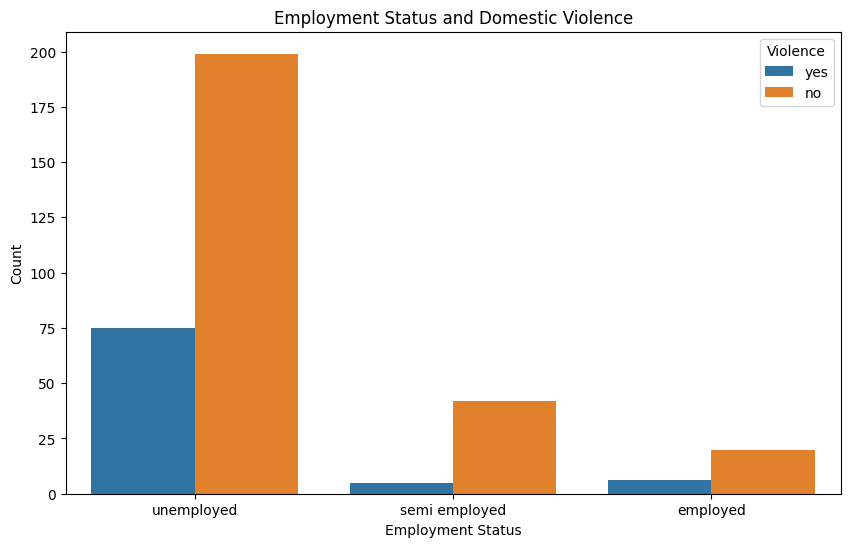

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x='Employment', hue='Violence', data=dom_violence)
plt.title("Employment Status and Domestic Violence")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

Martial Status and Domestic Violence

<Figure size 1000x600 with 0 Axes>

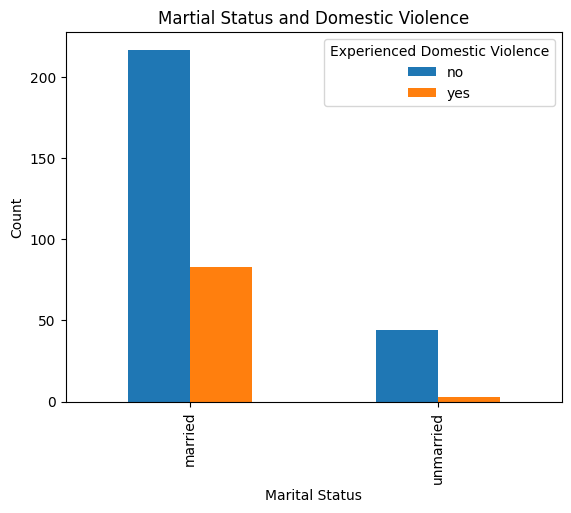

In [104]:
plt.figure(figsize=(10,6))
pd.crosstab(dom_violence['Marital status'], dom_violence['Violence']).plot(kind='bar')
plt.title("Martial Status and Domestic Violence")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Experienced Domestic Violence')
plt.show()

Income and Domestic Violence

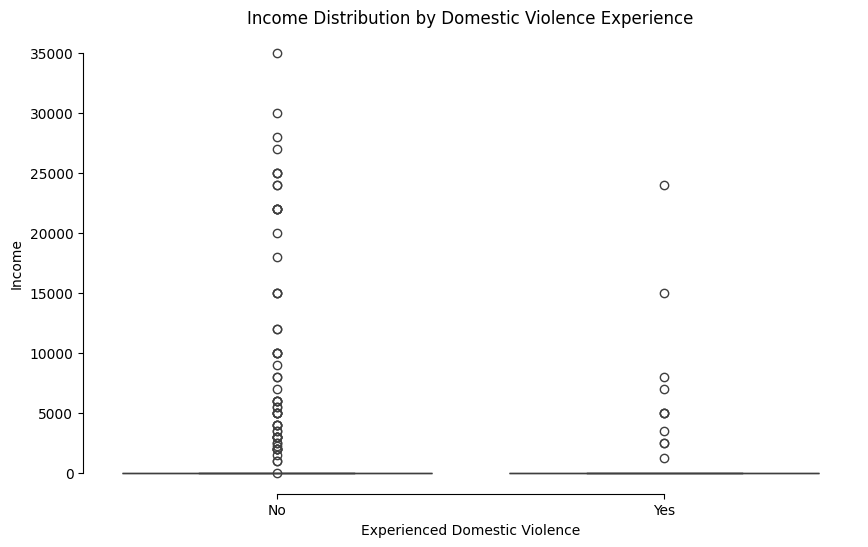

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Violence', y='Income', data=dom_violence, order=["no", "yes"])
plt.title("Income Distribution by Domestic Violence Experience")
plt.xlabel("Experienced Domestic Violence")
plt.ylabel("Income")
plt.xticks(["no", "yes"], ["No", "Yes"])  # Improve x-axis labels
sns.despine(trim=True)  # Remove top and right spines for a cleaner look
plt.show()

Income and Domestic Violence with Marital Status

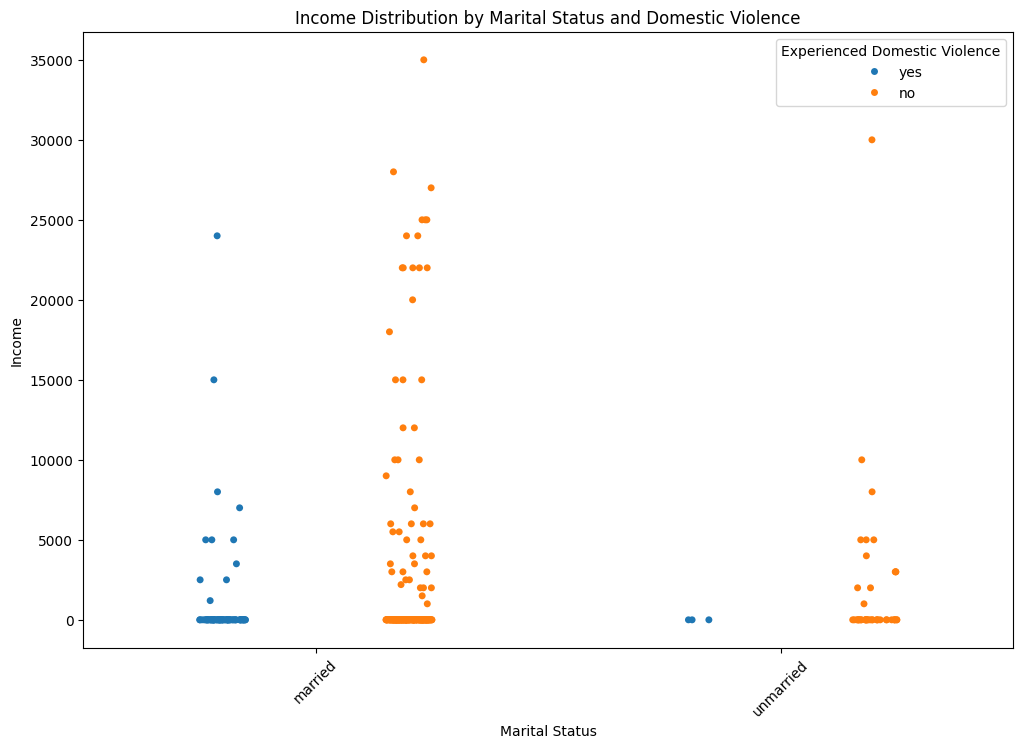

In [105]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Marital status', y='Income', hue='Violence', data=dom_violence, jitter=True, dodge=True, size=5)
plt.title('Income Distribution by Marital Status and Domestic Violence')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.legend(title='Experienced Domestic Violence')
plt.show()

In [98]:
# Count the occurrences of each unique income value
income_counts = dom_violence['Income'].value_counts()

# Convert Series to DataFrame
income_counts_df = pd.DataFrame(income_counts.reset_index())
income_counts_df.columns = ['Income', 'Count']

income_counts_df_sorted = income_counts_df.sort_values(by='Income')

In [99]:
income_counts_df_sorted

,Income,Count
0,0,272
19,8,1
17,1000,2
24,1200,1
23,1500,1
4,2000,5
20,2200,1
6,2500,4
2,3000,6
13,3500,3


Income Distribution Analysis: Impact of Marital and Employment Status on Domestic Violence

<ipython-input-106-77d1fae74db1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-106-77d1fae74db1>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


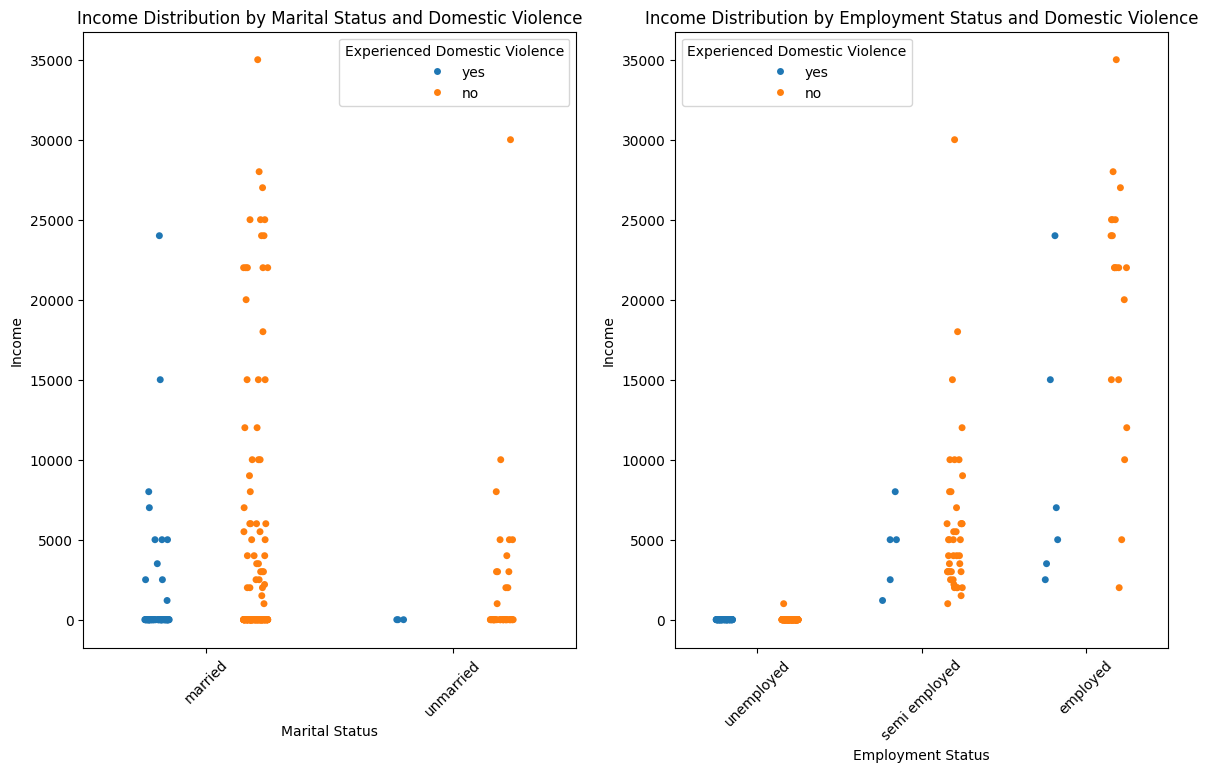

In [106]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Marital status chart
ax1 = plt.subplot(gs[0])
sns.stripplot(x='Marital status', y='Income', hue='Violence', data=dom_violence, jitter=True, dodge=True, size=5, ax=ax1)
ax1.set_title('Income Distribution by Marital Status and Domestic Violence')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Income')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title='Experienced Domestic Violence')

# Employment status chart
ax2 = plt.subplot(gs[1])
sns.stripplot(x='Employment', y='Income', hue='Violence', data=dom_violence, jitter=True, dodge=True, size=5, ax=ax2)
ax2.set_title('Income Distribution by Employment Status and Domestic Violence')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Income')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(title='Experienced Domestic Violence')

plt.show()

Original Analysis by

Sai Raam (@srinrealyf)

Linkedin | Github | X

Mail: srinrealyf@gmail.com